In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Load in the data
X = pd.read_csv("../Data/trainX-test.csv")
y = pd.read_csv("../Data/trainY-test.csv")

In [3]:
y = y['log_revenue']

In [4]:
# create a 75/25 stratified split of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.25)

In [5]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2249, 57) (2249,)
Test set: (750, 57) (750,)


# Modeling

## Random Forest

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor


In [7]:
# Scaling features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 

# Fit the random search model
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)

# Mean error calculations
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate absolute errors
errors = abs(y_pred - y_test.values)

# Calculate mean absolute percentage error
mape = 100 * (errors / y_test.values)

# Calculate and display percent accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: 1.167042163088573
Mean Squared Error: 2.8121555035799544
Root Mean Squared Error: 1.6769482709910746
Accuracy: 90.98 %


In [9]:
# Make Random Forest model

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())
y_pred = rf_random.predict(X_test)

# Mean error calculations
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate absolute errors
errors = abs(y_pred - y_test.values)

# Calculate mean absolute percentage error
mape = 100 * (errors / y_test.values)

# Calculate and display percent accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


Mean Absolute Error: 1.1598599970232177
Mean Squared Error: 2.8090184107950464
Root Mean Squared Error: 1.6760126523374
Accuracy: 90.71 %


In [10]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train.values.ravel())
y_pred = grid_search.predict(X_test)

# Mean error calculations
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate absolute errors
errors = abs(y_pred - y_test.values)

# Calculate mean absolute percentage error
mape = 100 * (errors / y_test.values)

# Calculate and display percent accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.9min finished


Mean Absolute Error: 1.2844128415473441
Mean Squared Error: 3.3956777753522145
Root Mean Squared Error: 1.842736491024209
Accuracy: 87.52 %


[8.32712866e-03 3.92822578e-03 1.26658502e-03 1.61372017e-02
 3.06280237e-03 1.15005527e-03 2.14260976e-03 3.02307810e-03
 4.60070026e-04 2.02359038e-04 2.65541204e-04 1.97958198e-04
 4.15045204e-04 2.52116779e-04 2.04263174e-04 5.09368715e-05
 1.17964333e-03 7.00275365e-04 2.21842473e-03 1.86160329e-03
 2.82722216e-03 3.25858199e-01 2.31492079e-02 7.04680532e-03
 2.12725222e-02 1.01326480e-02 2.89882833e-02 2.51480258e-02
 5.06438639e-03 1.10988034e-02 2.35712404e-02 6.89675930e-03
 1.75135248e-02 6.09773215e-03 1.81573972e-02 2.30183719e-03
 1.37587867e-02 2.15490570e-02 3.24968898e-03 2.90051131e-02
 1.88151361e-02 3.29309176e-02 9.13578549e-03 9.19548267e-04
 5.79413552e-03 1.48228565e-03 3.99553737e-03 6.84603602e-04
 1.05042832e-02 2.79003033e-03 4.27899975e-03 2.26316468e-03
 8.39583336e-03 6.25525520e-04 1.01669116e-02 2.02660788e-01
 3.48233504e-02]


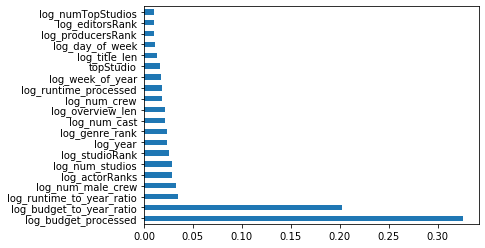

In [11]:
# Feature Importance
model = RandomForestRegressor()
model.fit(X_train, y_train.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.01781373 0.01461187 0.00386272 0.06565807 0.00772594 0.00373387
 0.01017469 0.0111972  0.00187874 0.00078203 0.00078999 0.00096312
 0.00151386 0.00127074 0.00079771 0.00034483 0.00655492 0.00334925
 0.00648059 0.00753274 0.00935408 0.14341237 0.01309828 0.0092238
 0.0154703  0.05242714 0.06161377 0.02591375 0.01025258 0.01465313
 0.01266184 0.00961662 0.00848995 0.00972896 0.01628823 0.00618946
 0.01031783 0.01666956 0.01133342 0.01496115 0.0152837  0.0324999
 0.01091467 0.00272076 0.00653491 0.00335802 0.00649883 0.00217721
 0.00935458 0.00936245 0.00453666 0.01418524 0.00771448 0.00189674
 0.01149318 0.20134553 0.02141032]


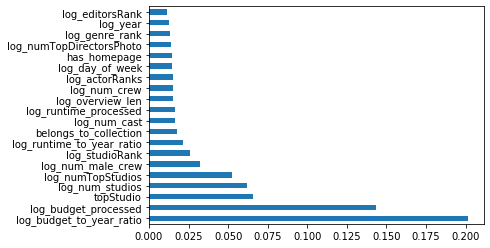

In [12]:
# More Feature Importance
model = ExtraTreesRegressor()
model.fit(X_train, y_train.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

(0, 0.004981043590189176)
(1, 0.0019044745620597158)
(2, 0.00018164791163921825)
(3, 0.02283516165779558)
(4, 0.0031962189225753124)
(5, 0.0005936855981948082)
(6, 0.0009394955247094539)
(7, 0.007339088824195088)
(8, 0.0006374963792241159)
(9, 0.0009682004663654784)
(10, 0.0010239566356951763)
(11, 0.000844799757802563)
(12, 0.00010731606731358124)
(13, 0.0005032890917965236)
(14, 3.0542066914438766e-05)
(15, 0.0)
(16, 5.687360888355032e-06)
(17, 0.0004494244335296012)
(18, 0.0009960498238461449)
(19, 0.0026377342468932932)
(20, 0.004544626152613528)
(21, 0.3456636816803265)
(22, 0.026902870920484687)
(23, 0.003608527460381513)
(24, 0.013561405348310233)
(25, 0.007574076905051295)
(26, 0.00809612038128447)
(27, 0.014782210492147813)
(28, 0.002588880358233969)
(29, 0.007504237046111297)
(30, 0.02454084701158974)
(31, 0.005233946382244276)
(32, 0.012490908894577447)
(33, 0.002456652653025261)
(34, 0.026408805382684957)
(35, 0.00018330598806218392)
(36, 0.014068994965551378)
(37, 0.023991

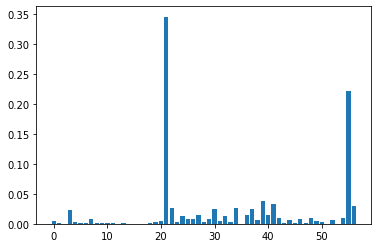

In [13]:
# Even More Feature Importance
model = DecisionTreeRegressor()
model.fit(X_train, y_train.values.ravel())
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print((i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## LightGBM

In [14]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error


OSError: dlopen(/Users/nick/opt/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/nick/opt/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found